In [1]:
# Install TF2.0
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 49.1MB/s 
     |████████████████████████████████| 419kB 45.4MB/s 
     |████████████████████████████████| 3.0MB 41.9MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Model

import numpy as np

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [0]:
# Create fake data
m = .3
b = .5

x = tf.random.uniform(shape = (100,))
noise = tf.random.normal(shape = (len(x),), stddev = .025)

y = m*x + b + noise

In [0]:
# Get train and test
X_train = x     # Just for sake of this example :)
y_train = y


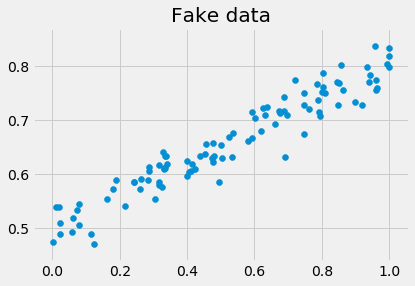

In [99]:
# Plot the data
plt.scatter(x, y)
plt.title('Fake data')
plt.show()

In [0]:
# Create variables
m = tf.Variable(0.)
b = tf.Variable(0.)

In [0]:
# Create prediction function
def predict(x):
    return m*x + b

In [0]:
# Define loss functions
def squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def logcosh(y_true, y_pred):
    return tf.reduce_mean(tf.math.log(tf.math.cosh(y_true - y_pred)))

In [114]:
# Define training params
learning_rate = .01
n_epochs = 501

for epoch in range(n_epochs):
    
    with tf.GradientTape() as tape:
        pred = predict(X_train)
#         loss = logcosh(y_train, pred)
        loss = squared_error(y_train, pred)
        
    gradients = tape.gradient(loss, [m, b])
    
    m.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
    
    if epoch % 25 == 0:
        print(f"Epoch {epoch} | Training loss = {loss.numpy()}")
        

Epoch 0 | Training loss = 0.4429086446762085
Epoch 25 | Training loss = 0.1198735311627388
Epoch 50 | Training loss = 0.03281966969370842
Epoch 75 | Training loss = 0.009358972311019897
Epoch 100 | Training loss = 0.003035683650523424
Epoch 125 | Training loss = 0.001330699771642685
Epoch 150 | Training loss = 0.0008703284547664225
Epoch 175 | Training loss = 0.0007454233709722757
Epoch 200 | Training loss = 0.0007109694415703416
Epoch 225 | Training loss = 0.0007009404362179339
Epoch 250 | Training loss = 0.0006975387223064899
Epoch 275 | Training loss = 0.0006959669408388436
Epoch 300 | Training loss = 0.0006949286907911301
Epoch 325 | Training loss = 0.0006940716993995011
Epoch 350 | Training loss = 0.0006932994001545012
Epoch 375 | Training loss = 0.0006925835623405874
Epoch 400 | Training loss = 0.0006919141160324216
Epoch 425 | Training loss = 0.0006912867538630962
Epoch 450 | Training loss = 0.0006906980997882783
Epoch 475 | Training loss = 0.0006901461165398359
Epoch 500 | Trai

In [0]:
# Get preds
# y_pred_logcosh = predict(X_train)
y_pred_mse = predict(X_train)

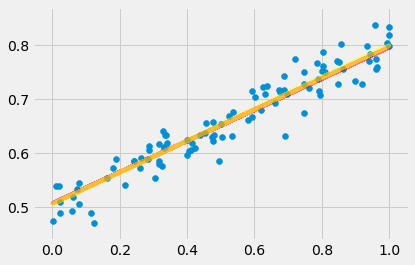

In [116]:
# Visualize
plt.scatter(x, y)
plt.plot(x, y_pred_logcosh, color = 'red', label = 'Loss = logcosh', alpha = .5)
plt.plot(x, y_pred_mse, color = 'yellow', label = 'Loss = MSE', alpha = .5)
plt.show()